# Objective :
Our task is to develop a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets.

# Importing Libraries

In [1]:
from pandas import read_csv
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf
import random as rn

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

rn.seed(1254)


# Loading Dataset

In [2]:
df = read_csv('Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


# Performing EDA on Dataset

In [ ]:
df.shape

(20000, 17)

In [ ]:
list(df.columns)

['letter',
 'xbox',
 'ybox',
 'width',
 'height',
 'onpix',
 'xbar',
 'ybar',
 'x2bar',
 'y2bar',
 'xybar',
 'x2ybar',
 'xy2bar',
 'xedge',
 'xedgey',
 'yedge',
 'yedgex']

In [ ]:
len(list(df.columns))

17

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [ ]:
df[df.duplicated()].shape

(1332, 17)


The `keep` parameter in `df.drop_duplicates(keep = )` specifies the action to take when there are duplicate rows in the DataFrame. It can take the following values:

* `'first'`: Keep the first occurrence of the duplicate rows.
* `'last'`: Keep the last occurrence of the duplicate rows.
* `False`: Remove all duplicate rows.

`keep` = `first` by default

In [3]:
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex


In [ ]:
df.shape

(18668, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18668 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  18668 non-null  object
 1   xbox    18668 non-null  int64 
 2   ybox    18668 non-null  int64 
 3   width   18668 non-null  int64 
 4   height  18668 non-null  int64 
 5   onpix   18668 non-null  int64 
 6   xbar    18668 non-null  int64 
 7   ybar    18668 non-null  int64 
 8   x2bar   18668 non-null  int64 
 9   y2bar   18668 non-null  int64 
 10  xybar   18668 non-null  int64 
 11  x2ybar  18668 non-null  int64 
 12  xy2bar  18668 non-null  int64 
 13  xedge   18668 non-null  int64 
 14  xedgey  18668 non-null  int64 
 15  yedge   18668 non-null  int64 
 16  yedgex  18668 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


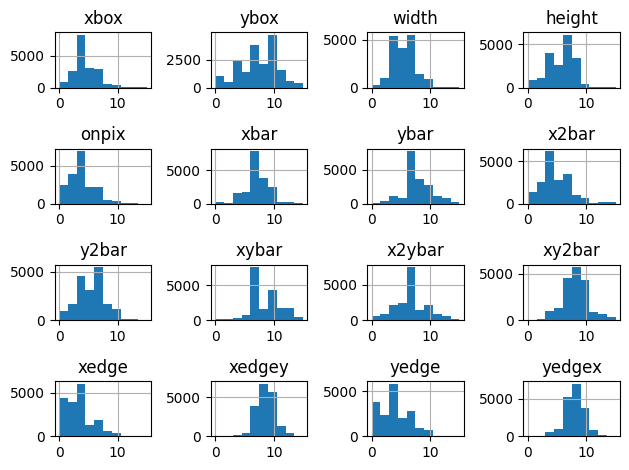

In [ ]:
df.hist()
plt.tight_layout()
plt.show()

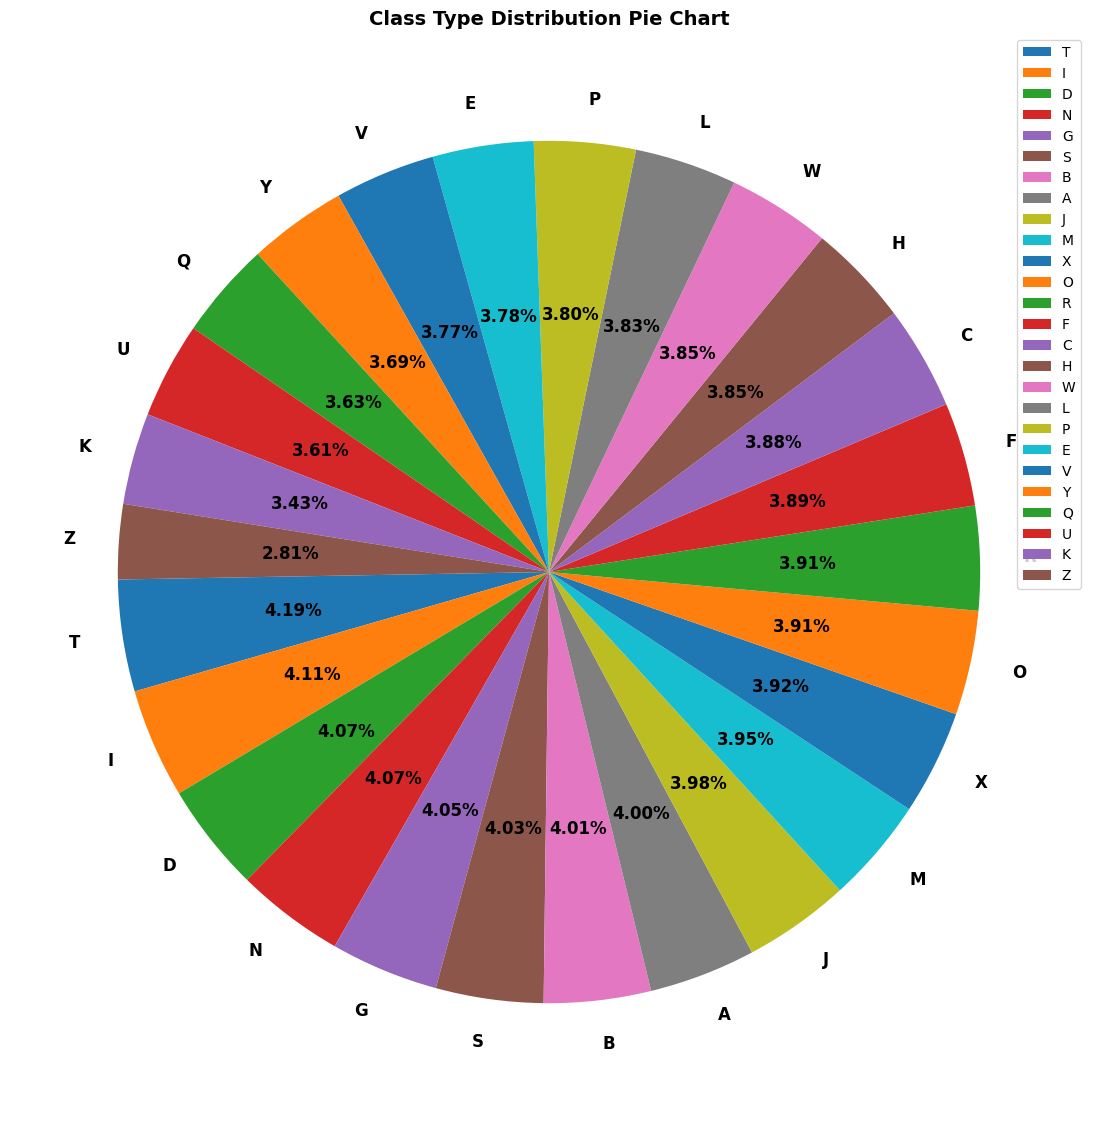

In [ ]:
plt.figure(figsize=(14, 14))
plt.pie(df['letter'].value_counts(), labels=df.letter.unique(),
        autopct='%.2f%%', startangle=181, textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'}) # autopct = display's the % if each class, upto 2 decimal places
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=14, fontweight='bold')
plt.show()

In [ ]:
correlation = df.drop('letter', axis=1).corr()
correlation.style.background_gradient(cmap='coolwarm')

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.753845,0.838201,0.656202,0.586514,-0.039371,0.035260,0.010554,0.035618,0.135848,0.033564,-0.045004,0.473408,0.094814,0.246954,-0.097928
ybox,0.753845,1.000000,0.660359,0.804746,0.529108,0.044918,-0.055264,-0.017451,0.077625,0.150073,-0.058348,-0.004483,0.262301,-0.007424,0.214834,-0.031288
width,0.838201,0.660359,1.000000,0.647059,0.747093,0.057657,0.007720,-0.108948,0.036848,0.088383,0.004005,-0.044465,0.548471,0.037140,0.225726,-0.111611
height,0.656202,0.804746,0.647059,1.000000,0.631189,0.043576,-0.028748,0.094866,0.030820,-0.005738,-0.009940,0.030940,0.250480,0.023574,0.289518,-0.006940
onpix,0.586514,0.529108,0.747093,0.631189,1.000000,0.138054,-0.046437,-0.006882,-0.095682,-0.111016,-0.079454,-0.037892,0.627043,0.011670,0.483866,-0.053799
xbar,-0.039371,0.044918,0.057657,0.043576,0.138054,1.000000,-0.394904,-0.053963,-0.127433,0.056401,-0.379856,-0.043720,0.139327,-0.259587,0.126966,0.258355
ybar,0.035260,-0.055264,0.007720,-0.028748,-0.046437,-0.394904,1.000000,-0.111068,-0.049806,0.155055,0.596464,-0.284431,-0.049289,0.561759,-0.096509,-0.211369
x2bar,0.010554,-0.017451,-0.108948,0.094866,-0.006882,-0.053963,-0.111068,1.000000,-0.163920,-0.309157,0.041791,0.087403,0.113528,-0.078674,0.033467,0.185946
y2bar,0.035618,0.077625,0.036848,0.030820,-0.095682,-0.127433,-0.049806,-0.163920,1.000000,0.123406,-0.049807,0.118624,-0.386254,-0.058009,0.240212,-0.061613
xybar,0.135848,0.150073,0.088383,-0.005738,-0.111016,0.056401,0.155055,-0.309157,0.123406,1.000000,0.042297,-0.119797,-0.197548,0.024034,-0.124774,-0.108670


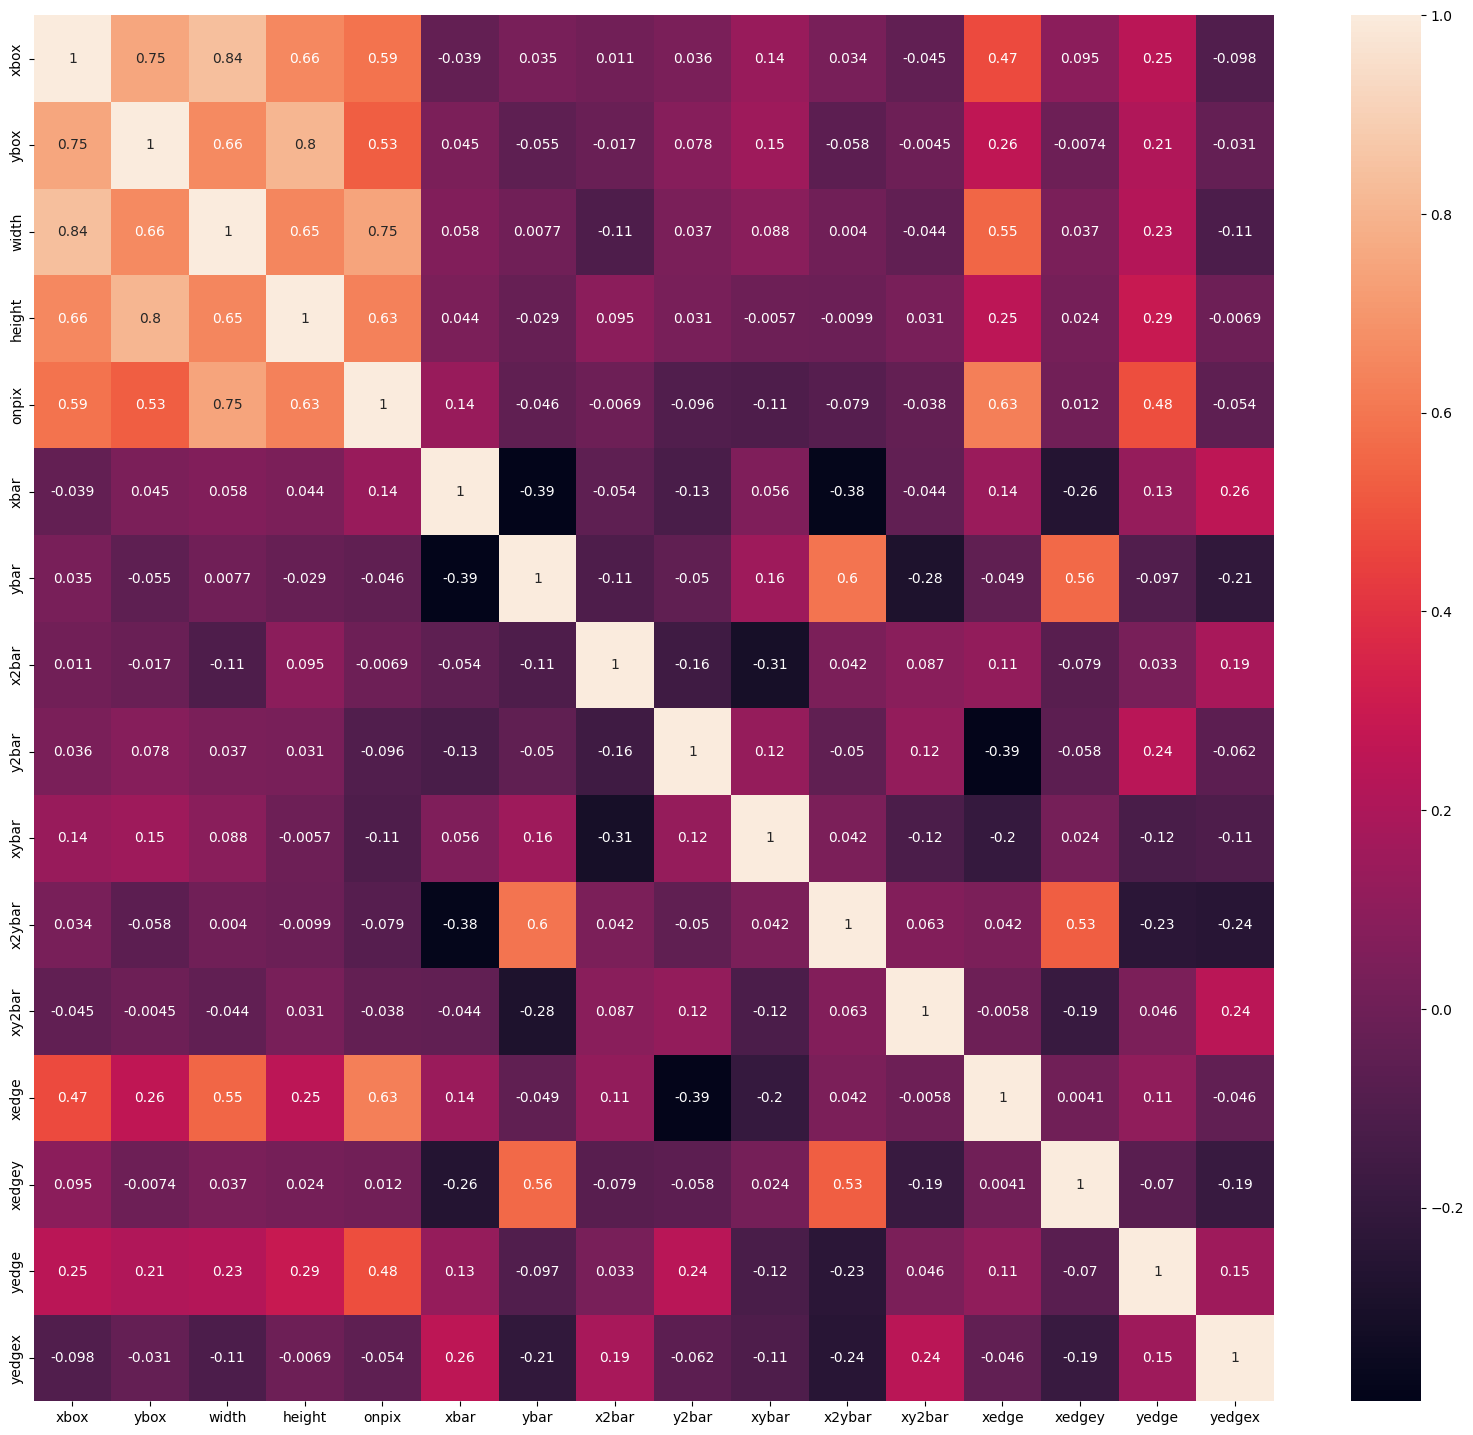

In [ ]:
sns.heatmap(data=correlation,
                annot=True)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100}) # runtime config. parameters = rct

plt.show()

## Encoding Target Variable

In [4]:
# coverting our target variable 'letter' to numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['letter'] = le.fit_transform(df['letter'])
df['letter'].unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

In [ ]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


# Splitting the Dataset into Train and Test Data

In [5]:
# array = df.values

x = df.drop('letter', axis=1)
y = df['letter']

In [ ]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [ ]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19994    19
19995     3
19996     2
19997    19
19999     0
Name: letter, Length: 18668, dtype: int64

In [ ]:
y.nunique()  # There are 26 unique alphabets in our dataset

26

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   letter  20000 non-null  int64
 1   xbox    20000 non-null  int64
 2   ybox    20000 non-null  int64
 3   width   20000 non-null  int64
 4   height  20000 non-null  int64
 5   onpix   20000 non-null  int64
 6   xbar    20000 non-null  int64
 7   ybar    20000 non-null  int64
 8   x2bar   20000 non-null  int64
 9   y2bar   20000 non-null  int64
 10  xybar   20000 non-null  int64
 11  x2ybar  20000 non-null  int64
 12  xy2bar  20000 non-null  int64
 13  xedge   20000 non-null  int64
 14  xedgey  20000 non-null  int64
 15  yedge   20000 non-null  int64
 16  yedgex  20000 non-null  int64
dtypes: int64(17)
memory usage: 2.6 MB


In [ ]:
# |# prompt: is it okay to use binary_cross entropy for above dataset

# No, it is not okay to use binary_cross entropy for the given dataset.

# The binary_crossentropy loss function is designed for binary classification problems, where the target variable can take only two possible values (0 or 1). In the given dataset, the target variable is the alphabet category, which can take on 26 possible values (A to Z). Therefore, using binary_crossentropy would be inappropriate.

# Instead, you should use the sparse_categorical_crossentropy loss function, which is designed for multi-class classification problems. The sparse_categorical_crossentropy loss function expects the target variable to be an integer representing the class label, and it calculates the loss based on the probability of the correct class.

# # Here is the modified code using the sparse_categorical_crossentropy loss function:



In [ ]:
# # prompt: for the above dataset how many neurons should i keep in o/p layer

# The number of neurons in the output layer should be equal to the number of classes in the dataset. In this case, since the dataset contains 26 alphabets, the output layer should have 26 neurons.


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(14934, 16)

# Model Building

## Deciding the No. of Neurons in Hidden Layer

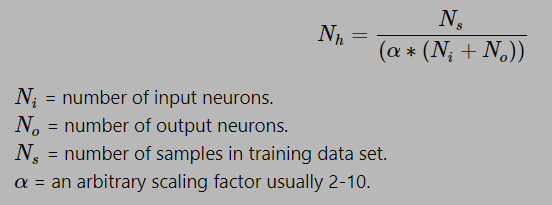

In [ ]:
(16000) / (3*(16+26))

126.98412698412699

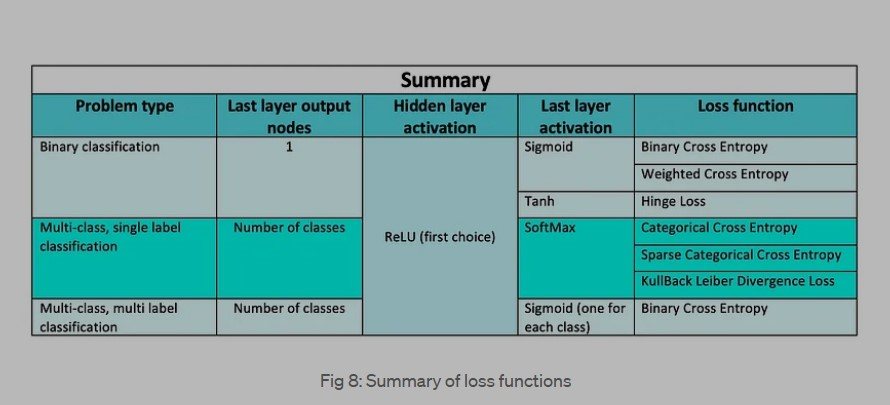

In [ ]:
# define keras model
model = Sequential()
model.add(Dense(126, input_dim=16, activation='relu')) # input_dim = 16
model.add(Dense(32, activation='relu'))
model.add(Dense(26, activation='softmax')) # 26 alphabets = 26 o/p layer neurons


In [ ]:
# Compile keras model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=50,validation_split=0.33, batch_size=10)

Epoch 1/50
1001/1001 [==============================] - 6s 5ms/step - loss: 1.8734 - accuracy: 0.4682 - val_loss: 1.2724 - val_accuracy: 0.6399
Epoch 2/50
1001/1001 [==============================] - 4s 4ms/step - loss: 1.0693 - accuracy: 0.6926 - val_loss: 0.9856 - val_accuracy: 0.7223
Epoch 3/50
1001/1001 [==============================] - 4s 4ms/step - loss: 0.8931 - accuracy: 0.7412 - val_loss: 0.9158 - val_accuracy: 0.7371
Epoch 4/50
1001/1001 [==============================] - 4s 4ms/step - loss: 0.7973 - accuracy: 0.7637 - val_loss: 0.8363 - val_accuracy: 0.7436
Epoch 5/50
1001/1001 [==============================] - 3s 3ms/step - loss: 0.7250 - accuracy: 0.7815 - val_loss: 0.7722 - val_accuracy: 0.7681
Epoch 6/50
1001/1001 [==============================] - 4s 4ms/step - loss: 0.6633 - accuracy: 0.7973 - val_loss: 0.7324 - val_accuracy: 0.7685
Epoch 7/50
1001/1001 [==============================] - 4s 4ms/step - loss: 0.6110 - accuracy: 0.8083 - val_loss: 0.6153 - val_accuracy:

In [ ]:
# evaluate keras model
scores = model.evaluate(x,y)
print("%s : %.2f%%" %(model.metrics_names[1], scores[1]*100))

584/584 [==============================] - 2s 3ms/step - loss: 0.2053 - accuracy: 0.9344
accuracy : 93.44%


## Classification Report

In [ ]:
# Define Expected unique labels
expected_labels = ['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']

# Evaluate the model
y_pred_probilities = model.predict(x_test)
y_pred_prob = np.argmax(y_pred_probilities, axis=1)

# Convert predicted labels back to original letters using inverse_transform
y_test_encoded= le.inverse_transform(y_test)                # converting ASCII code back to letter's for actual y values.
y_pred_encoded = le.inverse_transform(y_pred_prob)     # converting ASCII code back to letter's for predicted y values.


117/117 [==============================] - 0s 3ms/step


In [ ]:
# Generate classification report
report = classification_report(y_test_encoded, y_pred_encoded, target_names=expected_labels)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           T       0.97      0.97      0.97       152
           I       0.92      0.92      0.92       144
           D       0.92      0.93      0.93       128
           N       0.91      0.86      0.88       149
           G       0.95      0.84      0.89       134
           S       0.92      0.94      0.93       149
           B       0.83      0.90      0.86       130
           A       0.85      0.79      0.82       136
           J       0.91      0.91      0.91       106
           M       0.97      0.90      0.93       146
           X       0.91      0.91      0.91       152
           O       0.98      0.90      0.94       145
           R       0.98      0.93      0.95       163
           F       0.92      0.95      0.93       137
           C       0.86      0.89      0.87       131
           H       0.93      0.93      0.93       163
           W       0.87      0.95      0.91       153
    

* As per the above results we got F1 score above 90 , the model is performing well for all the classes

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


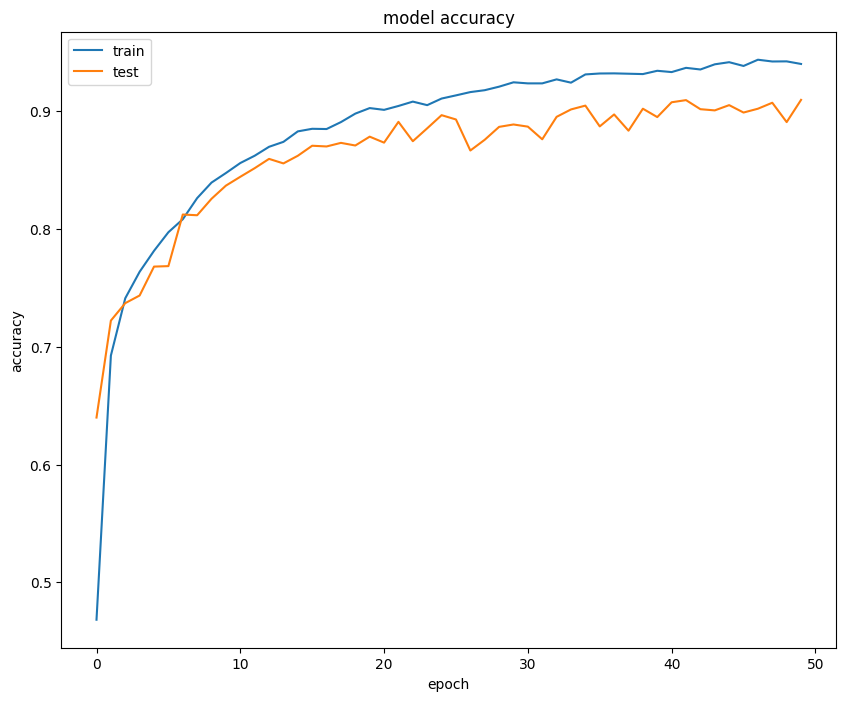

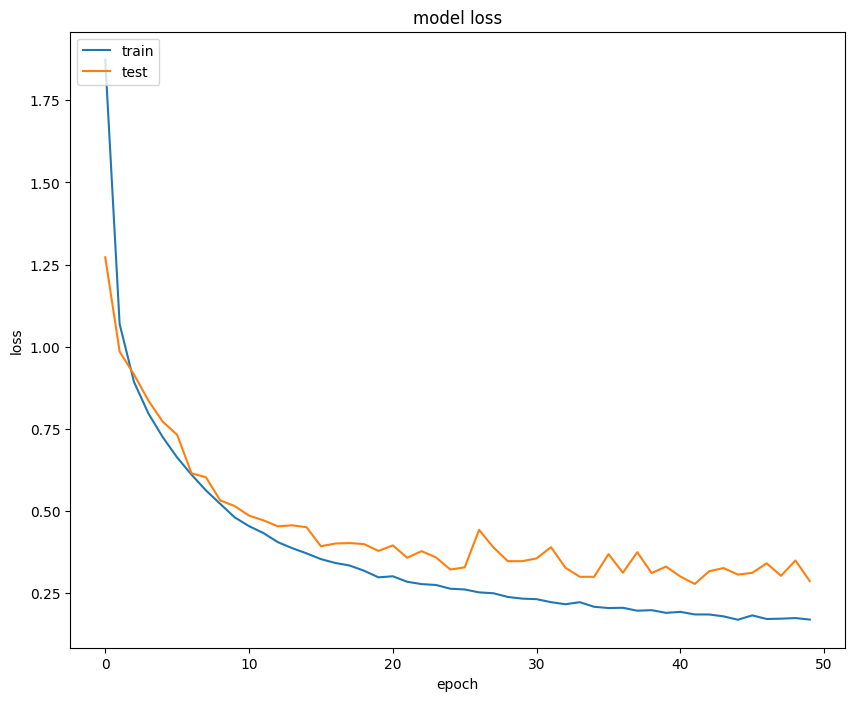

In [ ]:
# list all the data in the history
print(history.history.keys())

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history fo loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','test'], loc='upper left')
plt.show()

## Standardizing the data

In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

a = StandardScaler()
a.fit(x)
x_standardized = a.transform(x)

In [ ]:
x_standardized.shape

(18668, 16)

In [ ]:
x_standardized

array([[-1.14441743,  0.23706997, -1.17829391, ..., -0.22341228,
        -1.4947118 ,  0.13009585],
       [ 0.45185548,  1.49194265, -1.17829391, ..., -0.22341228,
         0.07996539,  1.33686814],
       [-0.08023549,  1.17822448,  0.37216713, ..., -0.8584093 ,
        -0.3137039 ,  0.73348199],
       ...,
       [ 1.51603743,  0.86450631,  1.40580782, ...,  0.41158474,
        -0.3137039 , -0.4732903 ],
       [ 0.98394646,  0.55078814,  0.37216713, ...,  2.3165758 ,
        -0.7073732 , -2.28344875],
       [-0.08023549,  0.55078814,  0.37216713, ..., -0.8584093 ,
        -0.7073732 ,  0.13009585]])

## Should i transform my target variables too?
- No, you should not transform your target variable.

- The purpose of transforming features is to ensure that they all have a similar scale, which can help improve the performance of machine learning models.
- However, the target variable in a classification problem is already categorical, and the values do not represent a scale.
- Transforming the target variable would not provide any benefit and could potentially harm the performance of your model.

- Therefore, you should leave the target variable untransformed and use it as is for training your model.

In [ ]:
y.shape

(18668,)

In [ ]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19994    19
19995     3
19996     2
19997    19
19999     0
Name: letter, Length: 18668, dtype: int64

In [ ]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04
mean,1.583382e-16,1.035288e-16,1.826979e-17,1.796530e-16,9.896138e-17,1.400684e-16,-8.563966e-17,1.583382e-16,9.667766e-17,-2.890814e-16,1.484421e-16,-6.813111e-17,6.280242e-17,-7.993035e-18,1.979228e-17,2.055352e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-2.208599e+00,-2.272675e+00,-2.728755e+00,-2.528154e+00,-1.694330e+00,-3.404919e+00,-3.245754e+00,-1.746100e+00,-2.241927e+00,-3.383441e+00,-2.458544e+00,-3.761249e+00,-1.347535e+00,-5.303388e+00,-1.494712e+00,-4.696993e+00
25%,-6.123265e-01,-7.040845e-01,-6.614736e-01,-6.918037e-01,-7.686173e-01,-4.524129e-01,-6.592928e-01,-6.035232e-01,-5.178190e-01,-5.481003e-01,-5.534933e-01,-4.388327e-01,-4.868905e-01,-2.234123e-01,-7.073732e-01,-4.732903e-01
50%,-8.023549e-02,2.370700e-01,-1.446532e-01,2.263714e-01,-3.057609e-01,3.967147e-02,-2.282158e-01,-2.226642e-01,-8.679188e-02,-1.430515e-01,-1.724832e-01,3.579817e-02,-5.656800e-02,-2.234123e-01,7.996539e-02,1.300958e-01
75%,4.518555e-01,8.645063e-01,3.721671e-01,6.854589e-01,6.199519e-01,5.317558e-01,6.339380e-01,5.390538e-01,7.752623e-01,6.670459e-01,5.895370e-01,5.104290e-01,3.737545e-01,4.115847e-01,4.736347e-01,7.334820e-01
max,5.772765e+00,2.433097e+00,5.023550e+00,4.358159e+00,5.248516e+00,3.976346e+00,3.220400e+00,3.966785e+00,4.223479e+00,2.692289e+00,3.256607e+00,3.358214e+00,5.107302e+00,4.221567e+00,4.410328e+00,4.353799e+00


# Tuning Hyperparameters : Batch Size & Epochs

In [8]:
# Importing the necessary packages

!pip install keras==2.12.0
from sklearn.model_selection import GridSearchCV, KFold

from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [9]:
# Create model

def create_model():
  model = Sequential()
  model.add(Dense(126, input_dim=16, kernel_initializer='random_uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
  model.add(Dense(26, kernel_initializer='random_uniform', activation='softmax'))

  adam=Adam(learning_rate =0.01)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

  return model

In [10]:
# Create the model
model=KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameter
batch_size=[10,20,40]
epochs=[10,50,100]

# Make a Dictionary of the GridSearch Parameters
param_grid=dict(batch_size=batch_size, epochs=epochs)

# Build and fit the GridSearchCV
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(x, y)

<ipython-input-10-c6877afca546>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=create_model, verbose=0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.035 total time= 1.4min
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.041 total time=  24.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.040 total time=  27.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.039 total time=  26.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.042 total time=  25.5s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [11]:
# summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.6118557870388031, using {'batch_size': 40, 'epochs': 100}
0.03937230408191681,0.0024565618718757494 with: {'batch_size': 10, 'epochs': 10}
0.15461497083306314,0.232654068227706 with: {'batch_size': 10, 'epochs': 50}
0.2872258350253105,0.21442105503736686 with: {'batch_size': 10, 'epochs': 100}
0.2474947229027748,0.26811780541992974 with: {'batch_size': 20, 'epochs': 10}
0.23596623539924622,0.2469757492871236 with: {'batch_size': 20, 'epochs': 50}
0.3132720269262791,0.3352342407857575 with: {'batch_size': 20, 'epochs': 100}
0.22865997329354287,0.24016617172988836 with: {'batch_size': 40, 'epochs': 10}
0.5861682653427124,0.2738039791332006 with: {'batch_size': 40, 'epochs': 50}
0.6118557870388031,0.19967413368546194 with: {'batch_size': 40, 'epochs': 100}


##Tuning of Hyperparameters: Learning rate & Drop out rate

In [12]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized, y)


<ipython-input-12-5c34c5ecc57c>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.652 total time= 1.3min
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.669 total time= 1.4min
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.642 total time= 1.0min
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.653 total time= 1.0min
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.613 total time= 1.4min
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [13]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.6460774779319763, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.6460774779319763,0.0184711126287944 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.6031733989715576,0.037917299301300535 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.2707351118326187,0.05703970224359328 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.5840980768203735,0.03386534357838413 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.5354589700698853,0.07546123758912587 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.07869048565626144,0.011850027956011502 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.5170346558094024,0.015544540684444703 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.47204142808914185,0.07832284817816816 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.06481527909636497,0.013344520310148081 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


## Tuning of Hyperparameters: Activation Function and Kernel Initializer

In [14]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 16,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)



<ipython-input-14-259db89b7c75>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.480 total time= 1.0min
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.518 total time= 1.0min
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.478 total time= 1.4min
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.452 total time= 1.1min
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.464 total time= 1.4min
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [15]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.6520796775817871, using {'activation_function': 'relu', 'init': 'normal'}
0.47862433195114135,0.022228658646052255 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.475302529335022,0.030570080583239952 with: {'activation_function': 'softmax', 'init': 'normal'}
0.16750549972057344,0.016212849363999617 with: {'activation_function': 'softmax', 'init': 'zero'}
0.6472052097320556,0.033693177743940886 with: {'activation_function': 'relu', 'init': 'uniform'}
0.6520796775817871,0.01632443382125434 with: {'activation_function': 'relu', 'init': 'normal'}
0.04071153700351715,0.003631014879909637 with: {'activation_function': 'relu', 'init': 'zero'}
0.6400791287422181,0.016599489358273038 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.6267405390739441,0.01895610007171099 with: {'activation_function': 'tanh', 'init': 'normal'}
0.04049708843231201,0.0014106939609870098 with: {'activation_function': 'tanh', 'init': 'zero'}
0.5895646572113037,0.013861762742704372 with:

## Tuning of Hyperparameter :Number of Neurons in activation layer

In [16]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 16,kernel_initializer = 'normal',activation = 'relu'))
    # model.add(Dropout(0.0))
    model.add(Dense(neuron2, input_dim = neuron1,kernel_initializer = 'normal',activation = 'relu'))
    # model.add(Dropout(0.0))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)


<ipython-input-16-9993ea74b9bf>:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.416 total time= 1.4min
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.178 total time= 1.0min
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.399 total time= 1.4min
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.389 total time= 1.3min
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.377 total time= 1.1min
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [17]:
# Summarize the results

print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.802603006362915, using {'neuron1': 16, 'neuron2': 8}
0.3519424915313721,0.08784694989922236 with: {'neuron1': 4, 'neuron2': 2}
0.5200899243354797,0.056430578480908156 with: {'neuron1': 4, 'neuron2': 4}
0.5981344819068909,0.013985440548724339 with: {'neuron1': 4, 'neuron2': 8}
0.4630396902561188,0.012121409999805065 with: {'neuron1': 8, 'neuron2': 2}
0.6467757105827332,0.025675090337549285 with: {'neuron1': 8, 'neuron2': 4}
0.7445891857147217,0.007397853730329292 with: {'neuron1': 8, 'neuron2': 8}
0.5010704815387725,0.011373084466219105 with: {'neuron1': 16, 'neuron2': 2}
0.719305157661438,0.010068871561843853 with: {'neuron1': 16, 'neuron2': 4}
0.802603006362915,0.006649676264792783 with: {'neuron1': 16, 'neuron2': 8}


## Training model with Optimum values of Hyperparameters

In [18]:
from sklearn.metrics import classification_report, accuracy_score
from keras.layers import Dropout
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(126, input_dim = 16, kernel_initializer = 'normal',activation = 'relu'))
    # model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 126, kernel_initializer = 'normal',activation = 'relu'))
    # model.add(Dropout(0.0))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model, verbose = 0,batch_size = 40, epochs = 100)

# Fitting the model

model.fit(x_standardized, y)

# Predicting using trained model

y_predict = model.predict(x_standardized)

# Printing the metrics
print(
  accuracy_score(y,y_predict))

<ipython-input-18-a6b443cb7994>:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model, verbose = 0,batch_size = 40, epochs = 100)


584/584 [==============================] - 1s 1ms/step
0.967966573816156


In [20]:
print('Accuracy :', accuracy_score(y,y_predict)*100)

Accuracy : 96.7966573816156


# Hyperparameters all at once

- The hyperparameter optimization was carried out by taking 2 hyperparameters at once.
- We may have missed the best values.
- The performance can be further improved by finding the optimum values of hyperparameters all at but it takes a lot of time. Since, we don't have access to GPU's.
- Also This process is computationally expensive.